### $\color{95B8D1}{\text{Tonic firing neural response for increasing current step values}}$

_This notebook aims to observe the tonic firing neural response of an AdEx neuron model to increasing current step values._

By analyzing the firing rates and observing the membrane potential changes, we can gain a better understanding of the neuron's excitability and its ability to generate tonic firing patterns.

### $\color{EDAFB8}{\text{Methods}}$

The AdEx neuron model equation is taken from _Brette et al., 2005_ [1](https://journals.physiology.org/doi/full/10.1152/jn.00686.2005)

### $\color{EDAFB8}{\text{Simulation}}$

The simulation is carried out with the _SpikingNeuralNetworks.jl_ package in _JuliaLanguage_. 

1. The required packages, including DrWatson, SNNExamples, Plots, and SpikingNeuralNetworks, are imported. The SNNExamples project is activated for convenient access to the necessary functionalities, as follows:

In [65]:
using Revise
using DrWatson

@quickactivate "SNNExamples"

using SpikingNeuralNetworks
using Plots

default(
    size=(900, 600),
    tickfontsize=10,
    guidefontsize=10,
    margin=8Plots.mm,
    titlefontsize=15,
    titlefontcolor=:dodgerblue4,
    legend=:outertopright,
)

SNN.@load_units

1.0e-6

2. Parameter definition:
- The current step values are defined in the _'Is'_ array, which represents an increasing range of current step values. 
- An empty array called _'firing_rate'_ is initialized to store the firing rates of the neuron.

In [66]:
Is = 1:5:200

const pA = ampere / 1e12


1.0e-6

3. The AdEx neuron model is defined using the _SNN.AdEx_ function, specifying the number of neurons (N) based on the length of Is and setting the model's parameters using the SNN.AdExParameter struct. The chosen parameter values include the resting potential (El), membrane time constant (τm), excitatory time constant (τe), adaptation coupling constant (a), spike-triggered adaptation (b), reset potential (Vr), threshold potential (Vt), and exponential parameter (ΔT).

In [67]:
E = SNN.AdEx(; N = length(Is), param = SNN.AdExParameter(; El = -70mV, τm = 20ms, Vt = -50mV, Vr = -70mV))

SpikingNeuralNetworks.AdEx{Vector{Float32}, Vector{Bool}}(SpikingNeuralNetworks.AdExParameter{Float32}(20.0f0, 5.0f0, 10.0f0, -50.0f0, -70.0f0, -70.0f0, 0.5f0, 2.0f0, 144.0f0, 4.0f-6, 6.0f-5), 40, Float32[-55.91304, -65.386, -66.49926, -67.38076, -67.91268, -67.12939, -55.100346, -68.65426, -62.255394, -69.26253  …  -50.99665, -58.390404, -58.54405, -52.49469, -58.69386, -53.24453, -54.201454, -56.01839, -61.82523, -64.15803], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Float32[-50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0  …  -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0], Float32[0.0,

4. The input current (I) of the AdEx neuron is set to the increasing current step values (Is). Monitoring is then enabled to track the membrane potential (v) and spike events (fire) of the AdEx neuron.

In [68]:
E.I = Is
E.v .= -60
SNN.monitor(E, [:v, :fire])

5. An empty array _firingrate_ is initialized to store firing rates.
The simulation is run using the SNN.sim! function, simulating a time duration of 1000 ms (simtime).
The sum of spike events (fire) recorded during the simulation is calculated and stored in the fr array.



In [69]:
firing_rate = []
simtime = 1000ms
SNN.sim!([E], []; duration = simtime)

6. The sum of spike events (fire) recorded during the simulation is calculated and stored in the _fr_ array.

      _(Calculation of the firing rate of the AdEx neuron over a specified simulation time)_

In [70]:
fr = sum(hcat(E.records[:fire]...),dims=2)

40×1 Matrix{Int64}:
   0
   0
   0
   0
  14
  25
  35
  44
  53
  62
   ⋮
 232
 238
 244
 256
 263
 270
 278
 286
 286

7. A plot is generated to visualize the f-I curve, showing the relationship between input current values (Is) and firing rates (fr).

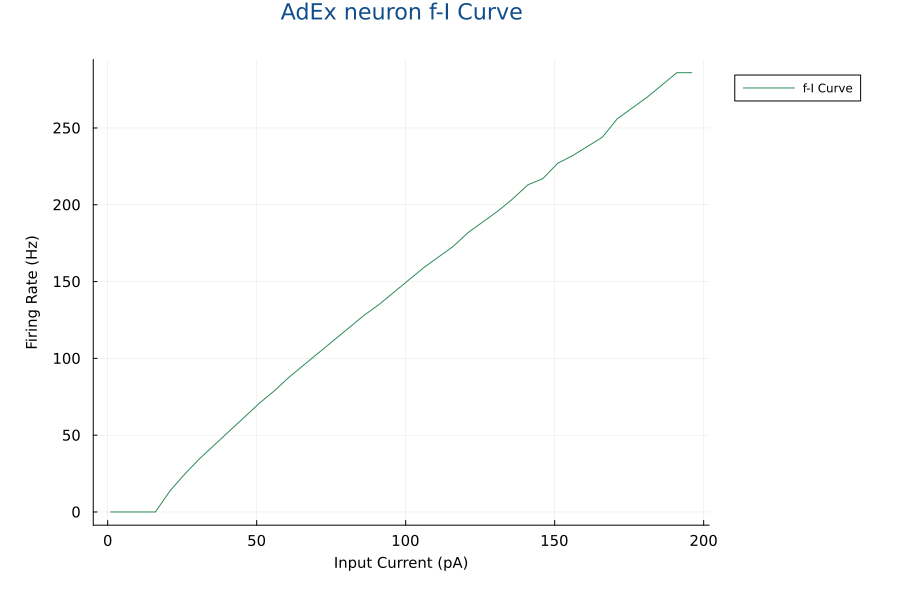

In [71]:
p=plot(Is,fr, 
xlabel = "Input Current (pA)", 
ylabel = "Firing Rate (Hz)",
title = "AdEx neuron f-I Curve",
color=:seagreen,
legend = :outertopright, 
label = "f-I Curve")

8. Finally, a scatter plot is visualized for a better analysis:

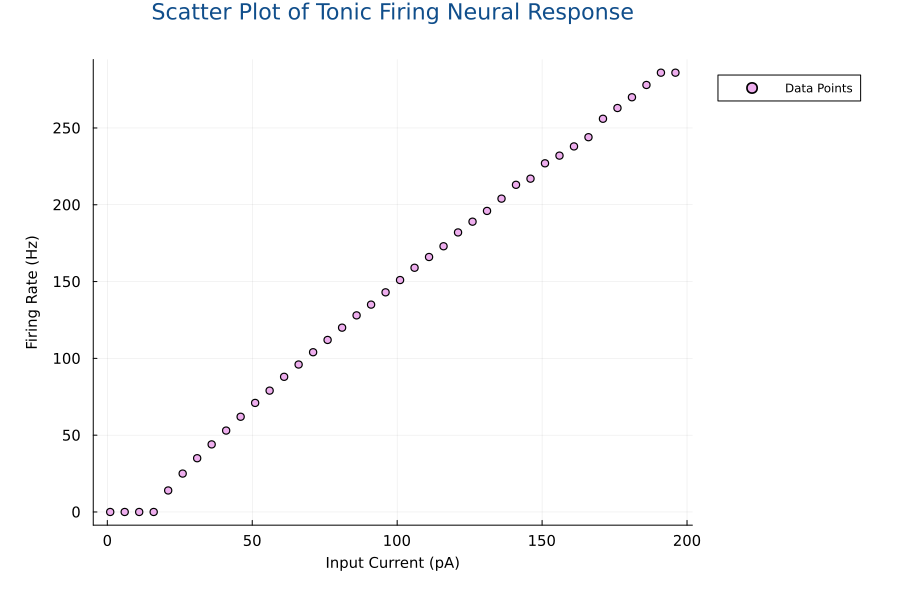

In [72]:
s=scatter(Is, fr, 
xlabel = "Input Current (pA)", 
ylabel = "Firing Rate (Hz)",
title = "Scatter Plot of Tonic Firing Neural Response",
legend = :outertopright, 
martersize = 4, color = :plum2, label = "Data Points")


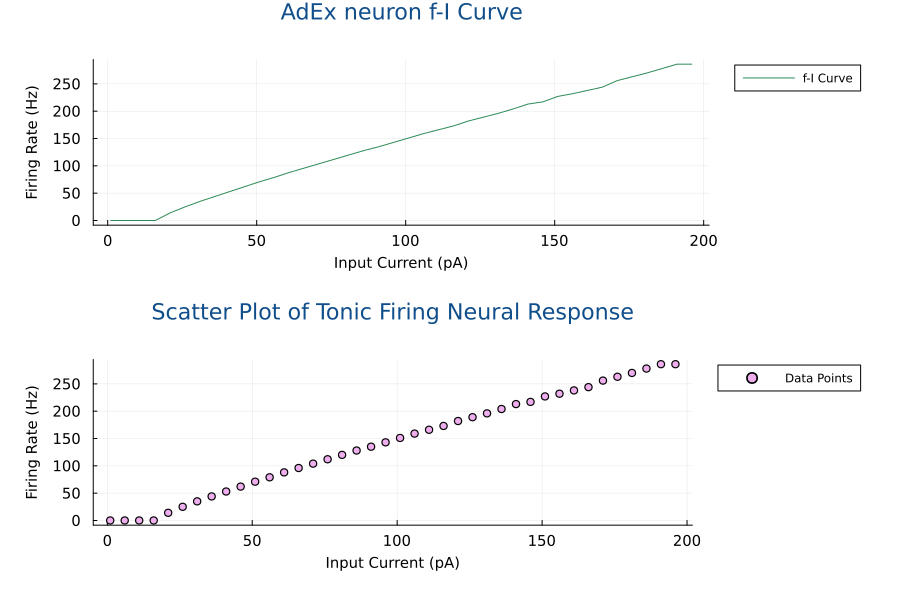

In [73]:
q= plot(p,s, layout=(2, 1))